# Topic Modeling
### ... in a nutshell:

<img src="https://moj-analytical-services.github.io/NLP-guidance/LDAresults.png" alt="lda" style="width: 600px;"/>

Partially pased on [this blogpost](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/) by Selva Prabhakaran.

In [136]:
import sys
import logging
import pandas as pd
import re, numpy as np
from pprint import pprint

import warnings

We will need to draw some plots:

In [137]:
%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

We again use Gensim library, but now we work with its topic modelling features.

In [138]:
# Gensim
import gensim, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

NLTK toolkit provides us with a corpus and additional tools:

In [139]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

We use Architectural features and indoor evacuation wayfinding for testing:

In [140]:
with open('/home/timur/Desktop/SO_articles/for_label_studio/Architectural Lessons From Environmental Psychology The Case of Biophilic Architecture.txt') as f:
    article = f.readlines()

In [141]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(article, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[article], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [142]:
# #     for sent in texts:
#         texts_out.append([wnl.lemmatize(token) for token in sent])

In [143]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def process_words(texts):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    for sent in texts:
        texts_out.append([wnl.lemmatize(token) for token in sent])
    # remove stopwords after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(article)  # processed Text Data!

In [144]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [145]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abstract', 1),
  ('adverse', 1),
  ('aesthetically', 1),
  ('architectural', 1),
  ('argued', 1),
  ('attracted', 1),
  ('built', 1),
  ('configuration', 1),
  ('contact', 1),
  ('content', 2),
  ('context', 1),
  ('countered', 1),
  ('discussed', 1),
  ('effect', 2),
  ('element', 1),
  ('environment', 1),
  ('environmental', 1),
  ('evolution', 1),
  ('feature', 3),
  ('field', 1),
  ('finding', 1),
  ('found', 1),
  ('fractal', 1),
  ('functioning', 1),
  ('geometry', 1),
  ('however', 1),
  ('human', 2),
  ('imitation', 1),
  ('integrating', 1),
  ('key', 1),
  ('landscape', 2),
  ('life', 1),
  ('literal', 1),
  ('modern', 1),
  ('natural', 3),
  ('nature', 1),
  ('nontrivial', 1),
  ('object', 1),
  ('opportunity', 1),
  ('particular', 1),
  ('physiological', 1),
  ('plant', 1),
  ('positive', 1),
  ('practical', 1),
  ('proposal', 1),
  ('psychological', 1),
  ('psychology', 1),
  ('ranging', 1),
  ('reduce', 1),
  ('reduced', 1),
  ('review', 1),
  ('several', 1),
  ('show'

The topic modelling we use is Latent Dirichlet Allocation. We have to skip the details here, but you can find all the details in [the original paper](https://ai.stanford.edu/~ang/papers/jair03-lda.pdf).

In [161]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.017*"architecture" + 0.009*"cultural" + 0.007*"natural" + '
  '0.006*"mechanism" + 0.006*"hindu" + 0.005*"system" + 0.005*"noise" + '
  '0.005*"human" + 0.005*"world" + 0.005*"neural"'),
 (1,
  '0.087*"fractal" + 0.024*"dimension" + 0.019*"pattern" + 0.013*"savanna" + '
  '0.011*"aesthetic" + 0.010*"characteristic" + 0.008*"geometry" + '
  '0.008*"value" + 0.007*"found" + 0.007*"preferred"'),
 (2,
  '0.023*"natural" + 0.014*"setting" + 0.014*"response" + 0.011*"element" + '
  '0.010*"environment" + 0.010*"architectural" + 0.009*"landscape" + '
  '0.009*"stress" + 0.009*"feature" + 0.008*"ulrich"'),
 (3,
  '0.031*"biophilic" + 0.030*"architecture" + 0.018*"nature" + 0.013*"level" + '
  '0.013*"well" + 0.011*"however" + 0.011*"presented" + 0.010*"factor" + '
  '0.010*"design" + 0.009*"argument"')]


In [162]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.471474042061812

Coherence Score:  0.3643176671817827


Let us see on the corpus and output model more precisely:

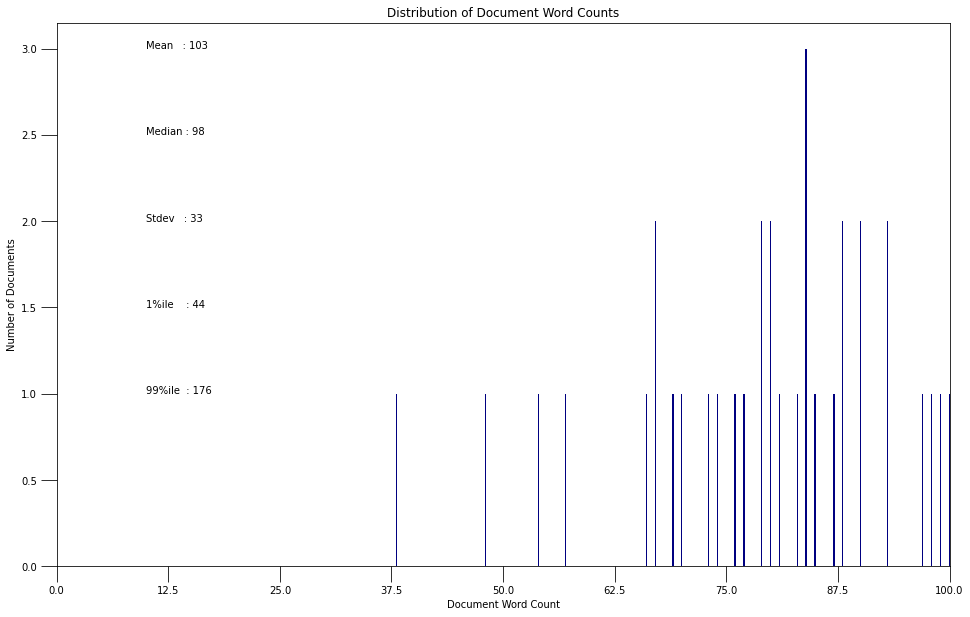

In [148]:
doc_lens = [len(d) for d in data_ready]

# Plot
plt.figure(figsize=(16,10))
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(10,  3, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(10,  2.5, "Median : " + str(round(np.median(doc_lens))))
plt.text(10,  2, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(10,  1.5, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(10,  1, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts')
plt.show()

In [149]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = {}
for i, topic in topics:
    if i  not in out:
        out[i] = {'word': [], 'importance': [], 'word_count': []}
    for word, weight in topic:
        out[i]["word"].append(word)
        out[i]["importance"].append(weight)
        out[i]["word_count"].append(counter[word])

/tmp/ipykernel_7220/1023882680.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(out[i]['word'], rotation=30, horizontalalignment= 'right')


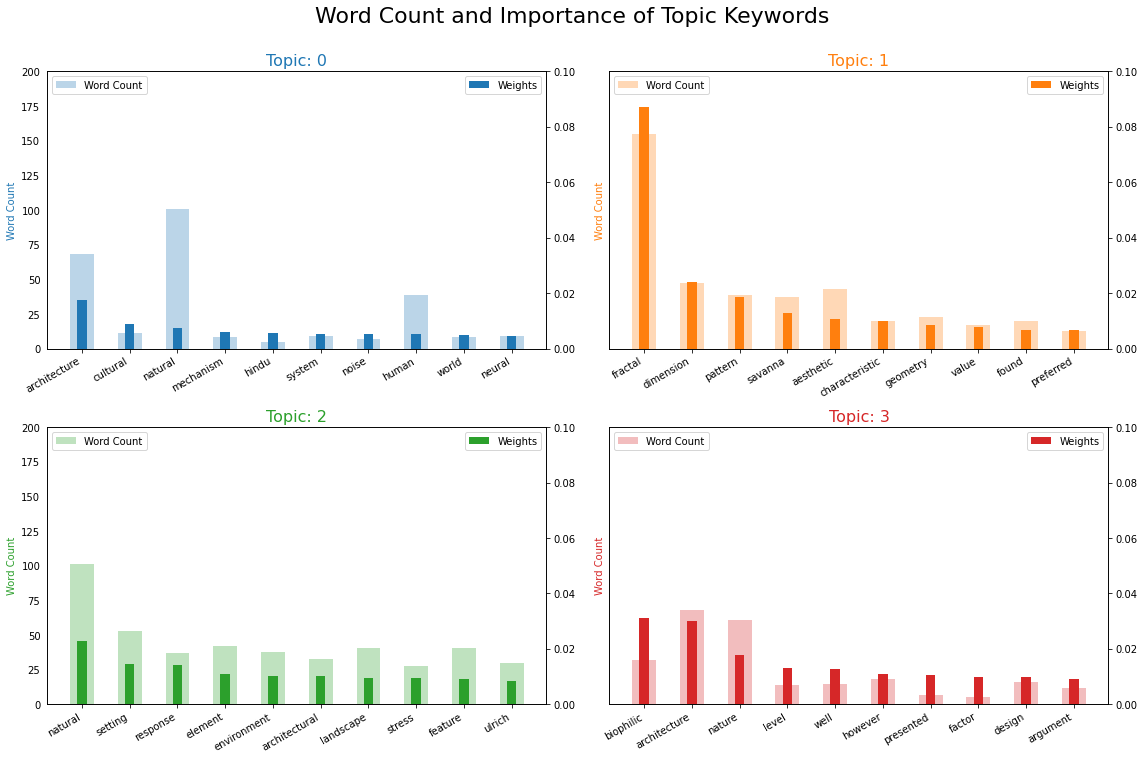

In [150]:
# Plot Word Count and Weights of Topic Keywords
import matplotlib.colors as mcolors

fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=out[i], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=out[i], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.10); ax.set_ylim(0, 200)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(out[i]['word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show();

In [151]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start=0, end=10):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(22, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1 + start) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-1), 
                 fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

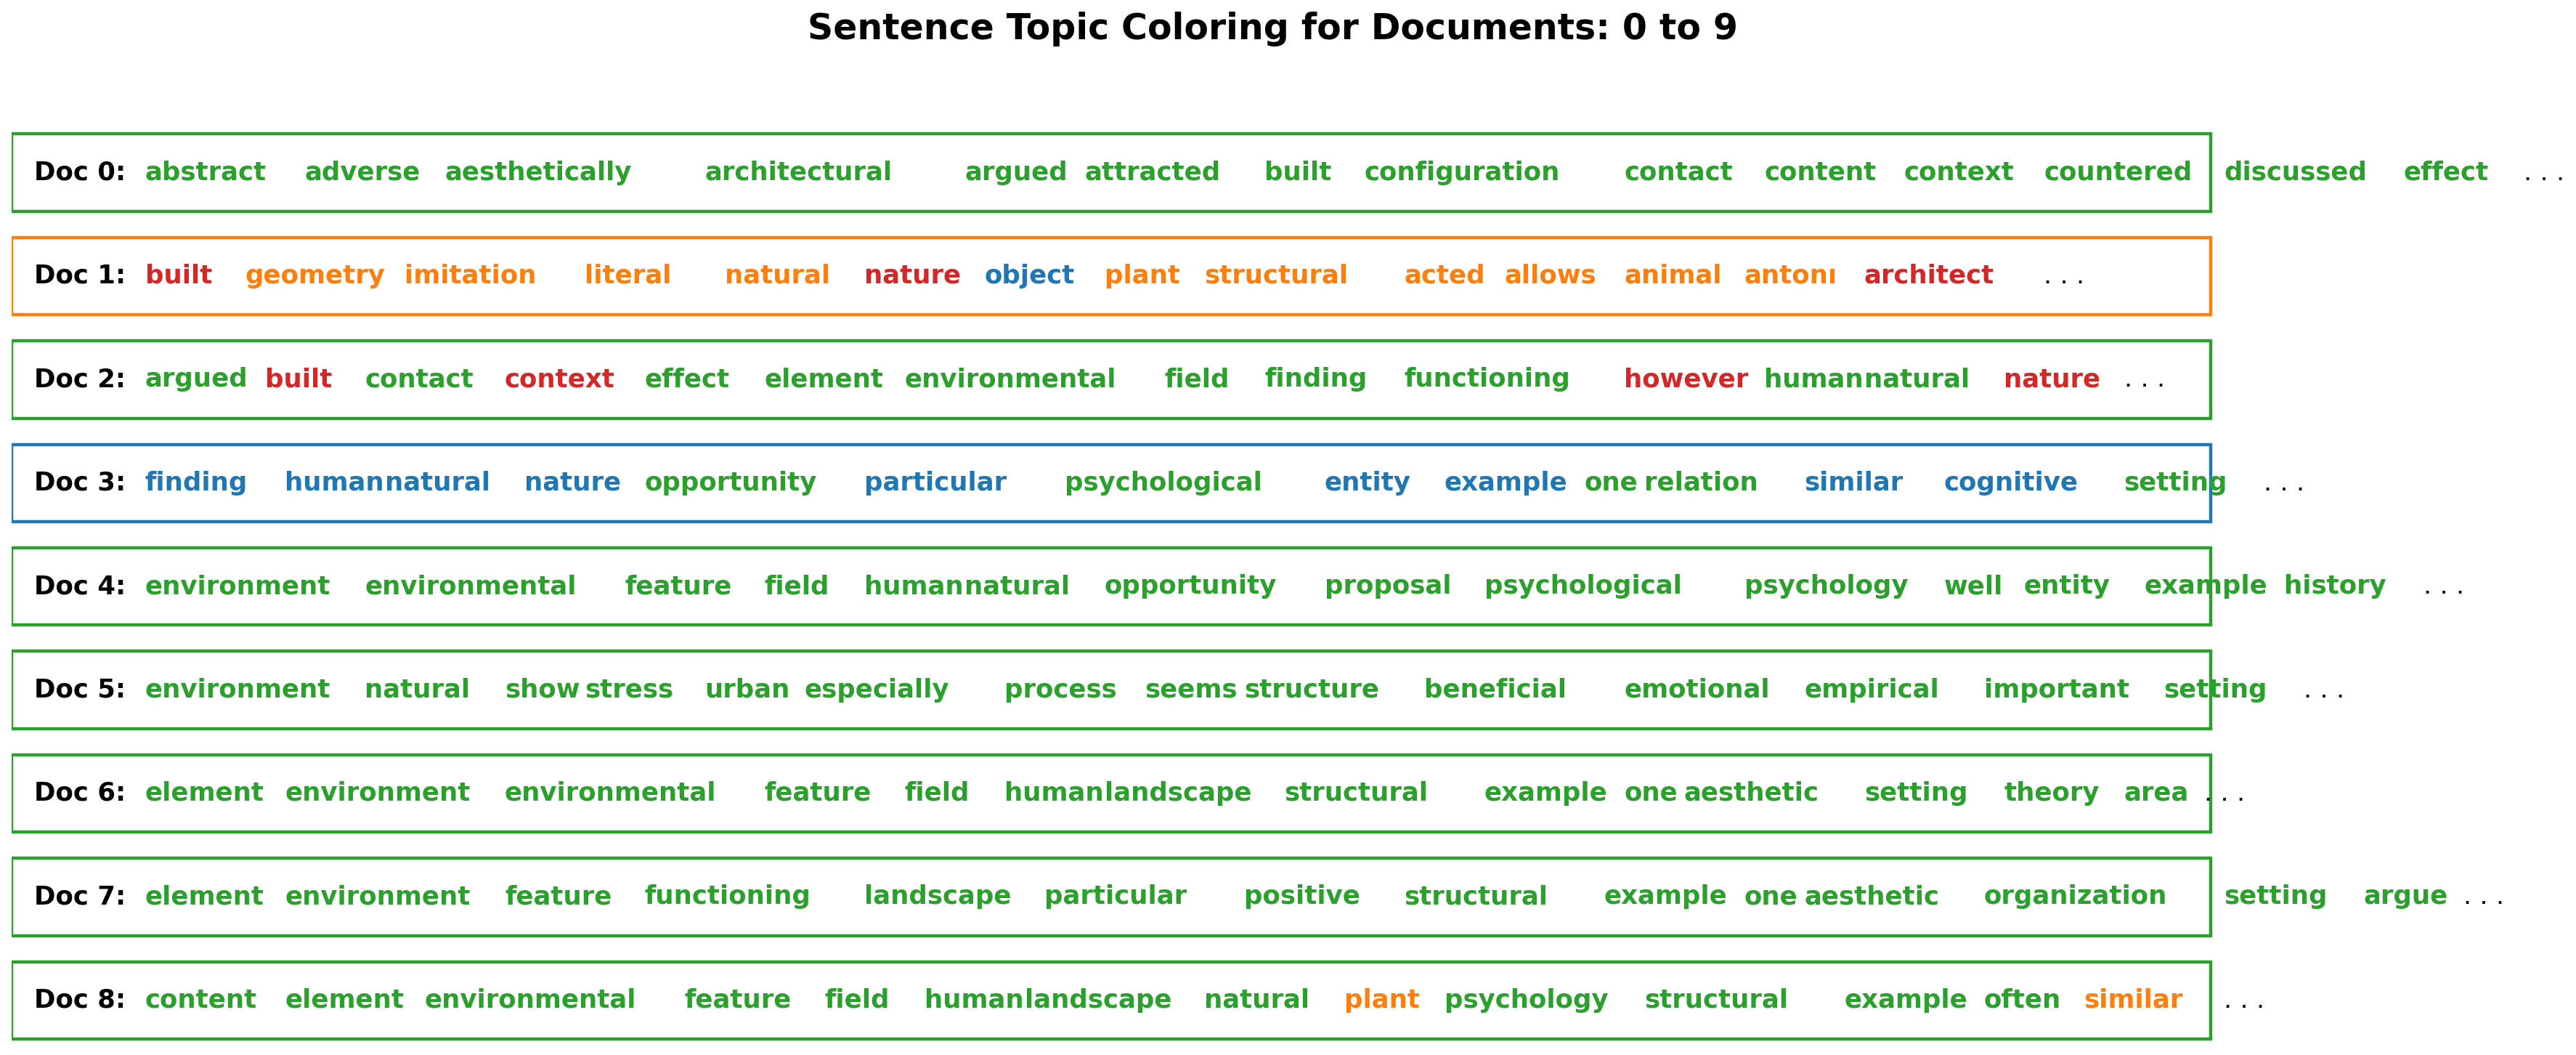

In [152]:
sentences_chart()  

For the final part we need an additional tool for visualization:

In [153]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/home/timur/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.080406 -0.163491       1        1  40.246212
1      0.122220  0.137407       2        1  26.951305
3     -0.247011  0.016493       3        1  18.256699
0      0.044384  0.009591       4        1  14.545784, topic_info=              Term        Freq       Total Category  logprob  loglift
22         fractal  156.000000  156.000000  Default  30.0000  30.0000
509      biophilic   36.000000   36.000000  Default  29.0000  29.0000
1100     dimension   41.000000   41.000000  Default  28.0000  28.0000
63    architecture   59.000000   59.000000  Default  27.0000  27.0000
416        pattern   34.000000   34.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
93         process    3.138680    6.071704   Topic4  -5.6916   1.2680
35          nature    3.562230   33.185713   Topic4  -5.5650  -0.3039
1018      symbolic    3.136324    7.497455   Topic4  -5.6924   1.0564
233        certain    3.169555   16.123905   Topic4  -5.6818   0.3012
77         example    3.169664   30.979695   Topic4  -5.6818  -0.3518

[216 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
303       1  0.903637  according
623       3  0.903658    account
1293      4  0.817945  activated
113       1  0.471024  aesthetic
113       2  0.498732  aesthetic
...     ...       ...        ...
621       2  0.308776       work
621       3  0.617552       work
111       4  0.785572      world
666       1  0.378949        yet
666       2  0.568424        yet

[247 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

In [154]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_ready, document=article):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    based_text = pd.Series(article)
    sent_topics_df = pd.concat([sent_topics_df, contents, based_text], axis=1)
    
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready, document=article)



# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Article']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Article
0,0,2.0,0.9878,"natural, setting, response, element, environme...","[abstract, review, finding, field, environment...",Abstract: A review of findings from the field ...
1,1,1.0,0.7107,"fractal, dimension, pattern, savanna, aestheti...","[natural, object, shape, process, often, acted...","\tNatural objects, shapes, and processes have ..."
2,2,2.0,0.6077,"natural, setting, response, element, environme...","[article, affirms, importance, natural, form, ...",\tThis article affirms the importance of natur...
3,3,0.0,0.8203,"architecture, cultural, natural, mechanism, hi...","[framework, different, psychological, subfield...",\tThe Psychoevolutionary Framework Different p...
4,4,2.0,0.9950,"natural, setting, response, element, environme...","[perhaps, psychological, field, profoundly, st...",\tPerhaps the psychological field that has mos...
5,5,2.0,0.9909,"natural, setting, response, element, environme...","[agreement, ulrich, model, empirical, evidence...","\tIn agreement with Ulrich’s (1983) model, emp..."
6,6,2.0,0.9911,"natural, setting, response, element, environme...","[aesthetic, preference, structural, landscape,...",\tAesthetic Preference and Structural Landscap...
7,7,2.0,0.9950,"natural, setting, response, element, environme...","[ulrich, framework, list, visual, cue, associa...",\tUlrich’s psychoevolutionary framework lists ...
8,8,2.0,0.7712,"natural, setting, response, element, environme...","[aesthetic, appeal, natural, content, addition...",\tThe Aesthetic Appeal of Natural Contents In ...
9,9,2.0,0.9916,"natural, setting, response, element, environme...","[benefit, explain, vegetative, element, settin...",\tThese benefits can explain why vegetative el...


In [165]:
df_dominant_topic.sort_values(by='Topic_Perc_Contrib' ,ascending=False).head(50).reset_index()

,index,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Article
0,7,7,2.0,0.9950,"natural, setting, response, element, environme...","[ulrich, framework, list, visual, cue, associa...",\tUlrich’s psychoevolutionary framework lists ...
1,4,4,2.0,0.9950,"natural, setting, response, element, environme...","[perhaps, psychological, field, profoundly, st...",\tPerhaps the psychological field that has mos...
2,60,60,3.0,0.9923,"biophilic, architecture, nature, level, well, ...","[nature, based, architecture, implies, buildin...",\tNature-based architecture implies that the b...
3,9,9,2.0,0.9916,"natural, setting, response, element, environme...","[benefit, explain, vegetative, element, settin...",\tThese benefits can explain why vegetative el...
4,6,6,2.0,0.9911,"natural, setting, response, element, environme...","[aesthetic, preference, structural, landscape,...",\tAesthetic Preference and Structural Landscap...
5,5,5,2.0,0.9909,"natural, setting, response, element, environme...","[agreement, ulrich, model, empirical, evidence...","\tIn agreement with Ulrich’s (1983) model, emp..."
6,0,0,2.0,0.9878,"natural, setting, response, element, environme...","[abstract, review, finding, field, environment...",Abstract: A review of findings from the field ...
7,61,61,3.0,0.9814,"biophilic, architecture, nature, level, well, ...","[growing, number, academic, involved, nature, ...",\tA growing number of academics are involved i...
8,40,40,1.0,0.9678,"fractal, dimension, pattern, savanna, aestheti...","[research, fractal, aesthetic, mainly, focused...",\tOther research into fractal aesthetics has m...
9,28,28,2.0,0.9431,"natural, setting, response, element, environme...","[another, structural, feature, positively, cor...",\tAnother structural feature that positively c...


In [156]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text", 'Article']

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text,Article
0,0.0,0.9178,"architecture, cultural, natural, mechanism, hi...","[besides, creative, consequence, reduced, cont...","\tBesides having creative consequences, reduce..."
1,1.0,0.9678,"fractal, dimension, pattern, savanna, aestheti...","[research, fractal, aesthetic, mainly, focused...",\tOther research into fractal aesthetics has m...
2,2.0,0.9950,"natural, setting, response, element, environme...","[perhaps, psychological, field, profoundly, st...",\tPerhaps the psychological field that has mos...
3,3.0,0.9923,"biophilic, architecture, nature, level, well, ...","[nature, based, architecture, implies, buildin...",\tNature-based architecture implies that the b...
